# Read the xarray

In [1]:
# read the processed netcdf file
import xarray as xr
ds_sat_processed = xr.open_dataset('ens_ana_data/LGMR_SAT_ens_processed.nc')
ds_sat=ds_sat_processed

# Read average curves of the ensemble

In [2]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

# Read change points defined by search min

In [ ]:
# # read the all_cp_array_M_min
# import pickle
# with open('ens_ana_data/all_cp_array_M_min.pkl', 'rb') as f:
#     all_cp_array_M_min = pickle.load(f)

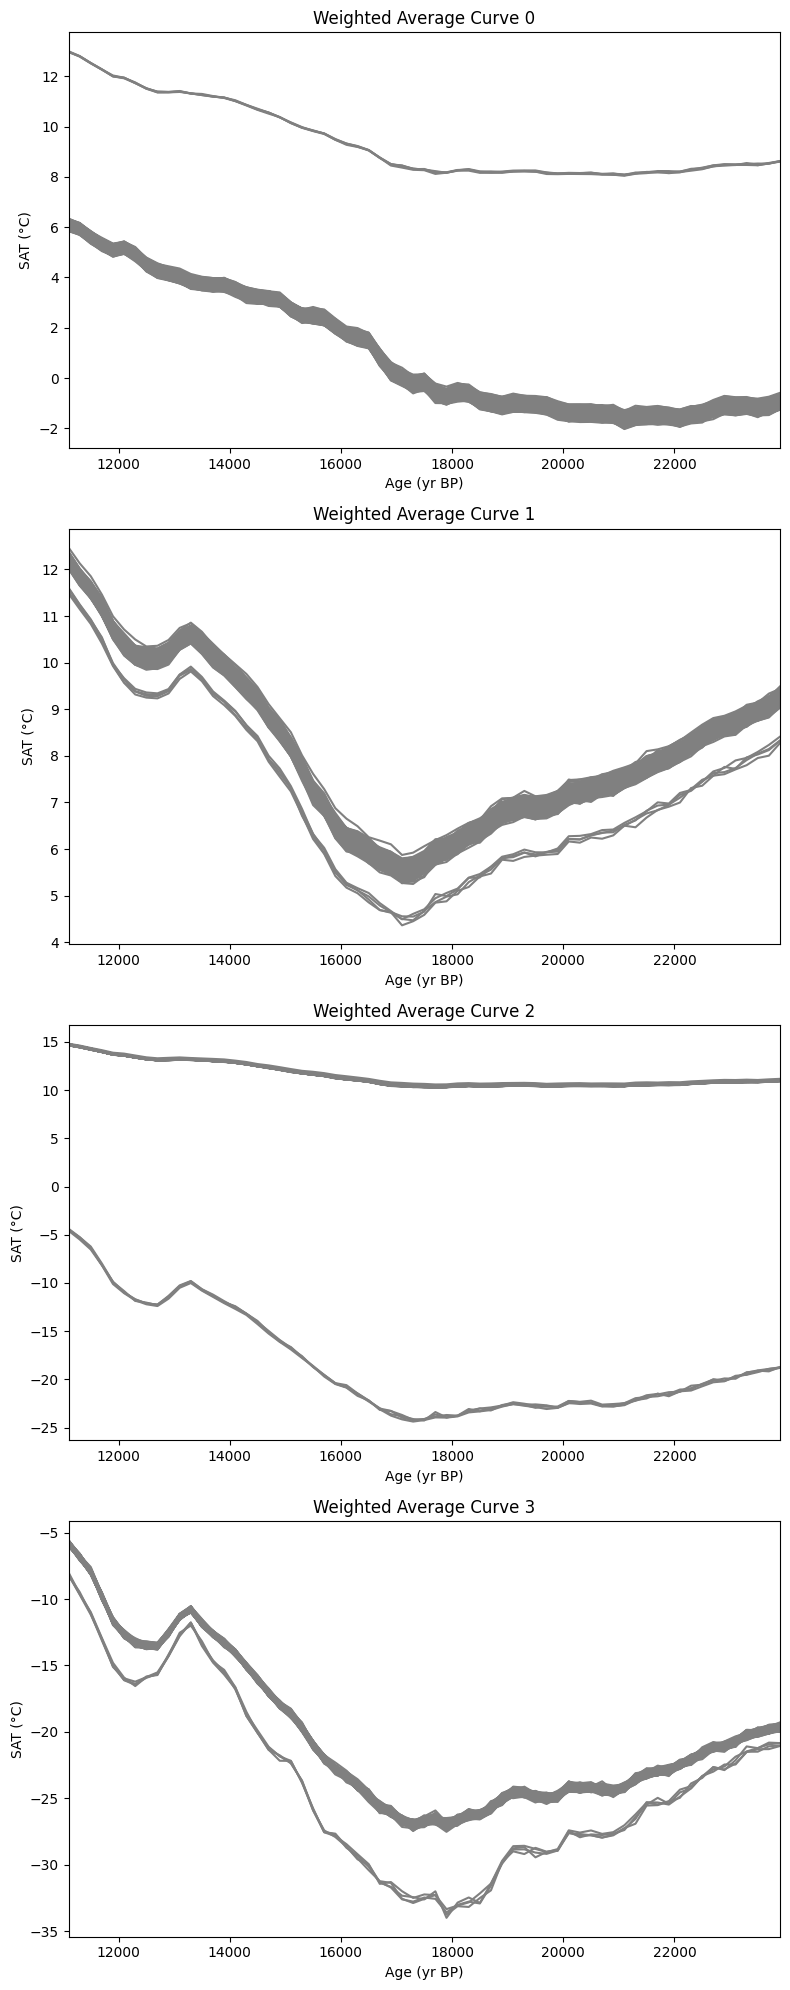

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Set up the figure and GridSpec
fig = plt.figure(figsize=(8, 20))  # Adjust the size as needed
gs = gridspec.GridSpec(4, 1, figure=fig)

# Plot each weighted_avg_curves[i]
for i in range(4):
    # Extract the i-th weighted average curve from each set in all_weighted_avg_curves, if it exists
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    ax = fig.add_subplot(gs[i, 0])
    # Loop through each curve in weighted_avg_curves_k and plot
    for idx,curve in enumerate(weighted_avg_curves_k):
        ax.plot(ds_sat['age'].values,curve,color='grey')  # Use the loop index as the ensemble identifier

    ax.set_title(f'Weighted Average Curve {i}')
    ax.set_xlabel('Age (yr BP)')  # Assuming 'Index' is the correct x-axis label
    ax.set_ylabel('SAT (°C)')  # Assuming 'Value' is the correct y-axis label
    # set x-axis range
    ax.set_xlim(np.min(ds_sat['age'].values), np.max(ds_sat['age'].values))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
all_weighted_avg_curves_0 = [curves[0] for curves in all_weighted_avg_curves if 0 in curves]